# Exploratory Data Analysis 

### Medical Insurance 

In [99]:
#Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**STEP 1: PROBLEM STATEMENT & DATA COLLECTION**

***1.1 PROBLEM STATEMENT***

**Customer Profile Analysis:**
Which age groups are more likely to incur higher health insurance costs?
Is there a correlation between body mass index (BMI) and insurance costs? Do people with a higher BMI tend to have higher premiums?
Does the habit of smoking significantly increase insurance costs compared to non-smokers?

**Demographic and Health Behavior Analysis:**
Are there differences in insurance costs between men and women?
Does the number of children/dependents influence insurance costs? Do customers with more dependents have higher costs?
Do people in certain regions tend to have higher average insurance costs?

**Behavioral and Lifestyle Factors:**
Is smoking associated with a considerable increase in health costs? What is the financial impact of smoking on insurance premiums?
Does the average insurance cost vary according to body mass index (BMI)?

**Temporal and Regional Analysis:**
Is there variation in insurance costs according to the region of residence? Which regions have higher average insurance premiums?
Is there any variation in insurance costs over time (e.g., a general increase in costs due to medical inflation)?

**Economic Factors and Insurance Costs:**
How do economic variables, such as average health expenses by region, influence insurance premiums?
Is there a relationship between economic variables (like medical inflation) and customers’ predisposition to purchase more comprehensive insurance?

**Insurance Premium and Customer Adherence:**
What are the main factors that lead customers to have higher health insurance costs? How do age, BMI, smoking status, and number of dependents influence these costs?
How do these costs influence health insurance adherence? Do customers with higher premiums tend to discontinue the service?

***1.2 DATA COLLECTION***

In [100]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.to_csv("../data/raw/medical_insurance_data.csv", index=False)

**STEP 2: EXPLORATION & DATA CLEANING**

***2.1. EXPLORATION***

****2.1.1 Understanding the features****

To answer the above questions and develop a predictive model, we collected data on the following variables:

**age-** Age of primary beneficiary `(numeric)`

**sex-** Gender of the primary beneficiary `(categorical)`

**bmi-** Body mass index `(numeric)`

**children-** Number of children/dependents covered by health insurance `(numeric)`

**smoker-** Is the person a smoker? `(categorical)`

**region-** Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest `(categorical)`

**charges-** Health insurance premium `(numerical)`

In [102]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(1338, 7)


In [103]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [104]:
# Obtaining Dataset statistics description:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [105]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Display results
print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('O') dtype('float64')]
Number of categorical variables: 3
Categorical variables: ['sex', 'smoker', 'region']


Number of numerical variables: 4
Numerical variables: ['age', 'bmi', 'children', 'charges']


#### Statements

* This DataFame is composed by 1338 rows and 7 columns (variables).
* There are no variables with null values.
* The data has:
    * **3 categorical variables** - 'sex', 'smoker'and 'region'.
    * **4 numerical variables** - 'age', 'bmi', 'children' and 'charges'.

****2.1.2. Identifying Null Values in each feature****

In [106]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*STATEMENT:* 
* there are no null values ​​in any variable

***2.2 ELIMINATE DUPLICATES***

In [107]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1
Duplicate rows have been removed. Row count reduced from 1338 to 1337.


***2.3 ELIMINATE IRRELEVANT INFORMATION***

* all variables will be kept.

I will not excluded any variable at this stage because each one can contribute to the prediction of insurance costs, either directly or in combination with others.

**STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

In [108]:
# Split the original dataframe by numerical and categorical values

num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

***3.1. ANALYSIS OF CATEGORICAL VARIABLES***

In [109]:
df_categorical.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


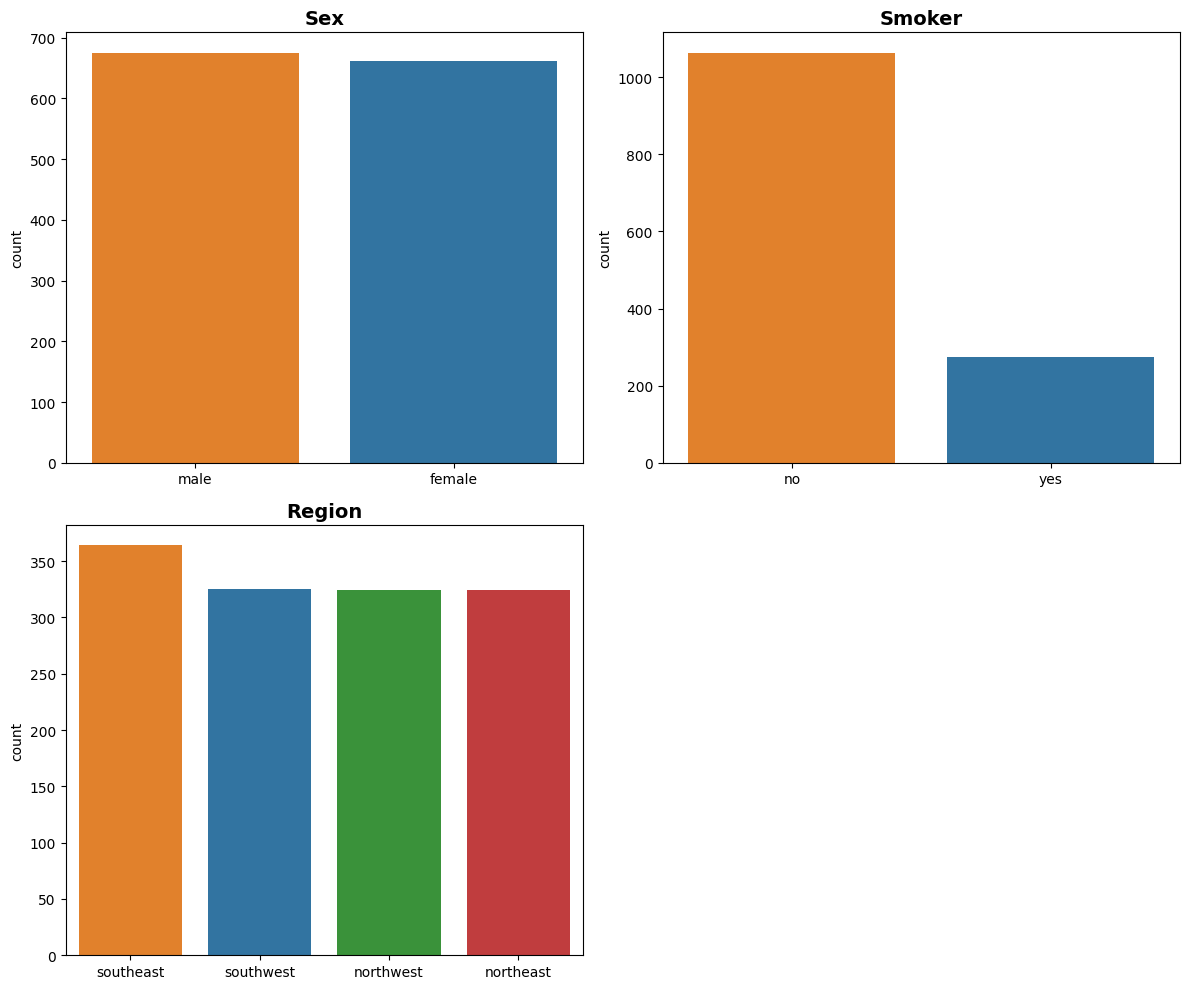

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot for 'sex'
sns.countplot(ax=ax[0, 0], data=df_categorical, x='sex', order=df_categorical['sex'].value_counts().index, hue='sex')
ax[0, 0].set_title("Sex", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel(None)  # Remove x-axis label

# Plot for 'smoker'
sns.countplot(ax=ax[0, 1], data=df_categorical, x='smoker', order=df_categorical['smoker'].value_counts().index, hue='smoker')
ax[0, 1].set_title("Smoker", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel(None)  # Remove x-axis label

# Plot for 'region'
sns.countplot(ax=ax[1, 0], data=df_categorical, x='region', order=df_categorical['region'].value_counts().index, hue='region')
ax[1, 0].set_title("Region", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel(None)  # Remove x-axis label

# Remove the empty subplot (bottom-right)
fig.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


#### Statements

**Sex**

The distribution between men and women is almost balanced, with a slightly higher count of men compared to women.

**Smoker**

The majority of people are non-smokers, with a significant proportion of smokers, but still in smaller numbers. This imbalance may be relevant to the analysis, as smoking status is an important variable in determining the cost of insurance. Smokers tend to have higher insurance premiums due to the risk of smoking-related health conditions.

**Region**

The four regions (southeast, southwest, northwest, northeast) are well represented in the dataset, with a slight concentration in the southeast region.

***3.2. ANALYSIS OF NUMERICAL VARIABLES***

In [111]:
df_numerical.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [112]:
def plot_numerical_variables(df_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - df_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `df_numerical`.
    """
    # Get all numerical columns from `df_numerical`
    numerical_columns = df_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the histogram
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

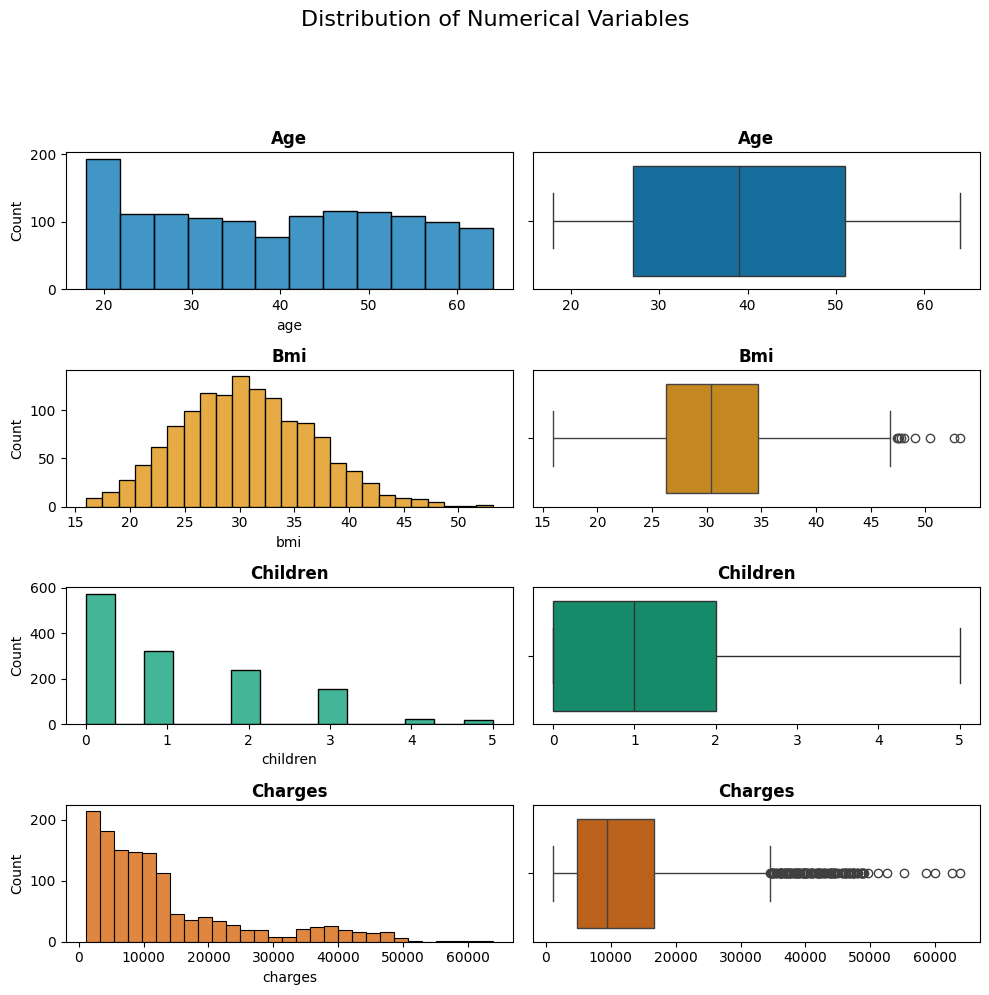

In [113]:
# Obtaining numerical variables graphs
plot_numerical_variables(df_numerical)

**Age:**

* The age histogram shows a relatively even distribution between 20 and 60 years old, with a slight concentration in younger age groups.

* The boxplot indicates that most ages are symmetrically distributed, with no significant outliers.

**BMI (Body Mass Index):**

* BMI has an approximately normal distribution, centered around 30, with most values ​​ranging from 20 to 40.

* The boxplot reveals the presence of a few outliers above 40, suggesting that some individuals have a higher BMI, which may influence the cost of health insurance.

**Children (Number of Children/Dependents):**

* The distribution of children is highly concentrated at zero and one dependent, with few cases of families with four or five children/dependents.

* The boxplot reflects this concentration, with values ​​predominantly between zero and two children and no significant outliers.

**Charges (Health Insurance Cost):**

* The charges variable has a right-skewed distribution, with most costs below 20,000, but with a long tail extending up to 60,000.

* The boxplot confirms this asymmetry, showing several outliers, which indicate higher insurance premiums, possibly associated with specific risk factors, such as smoking or health conditions.

**Outliers:** These distributions show that the bmi and charges variables have outliers, which may indicate groups of customers with specific characteristics or risks that impact the cost of insurance.

**4. ANALYSIS OF MULTIVARIATE VARIABLES**

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

***4.1. Encoding Categorical Values and Saving JSON files***

In [114]:
# Create a copy of the original DataFrame to apply the encoding overrides
df_n = df.copy()

In [115]:
# Create a copy of the original DataFrame to apply the encoding overrides
df_n = df.copy()

# Ensure the directory exists to save JSON files
os.makedirs('../data/interim/enc/', exist_ok=True)

# Loop over each column to create and save the encoder as a JSON file
for col in df_categorical.columns:
    # Get unique values and create an encoding dictionary
    unique_values = list(df_categorical[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Save the encoding dictionary as a JSON file
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

# Load and apply the encoding from JSON files
for col in df_categorical.columns:
    # Load the encoder dictionary from the saved JSON file
    encoder_dict = json.load(open(f'../data/interim/enc/{col}_n.json'))
    
    # Apply the mapping to the column in the DataFrame
    df_n[col] = df_n[col].map(encoder_dict)


In [116]:
# Verify that the encoding has been applied
df_n.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


***4.2. CATEGORICAL-CATEGORICAL ANALYSIS***

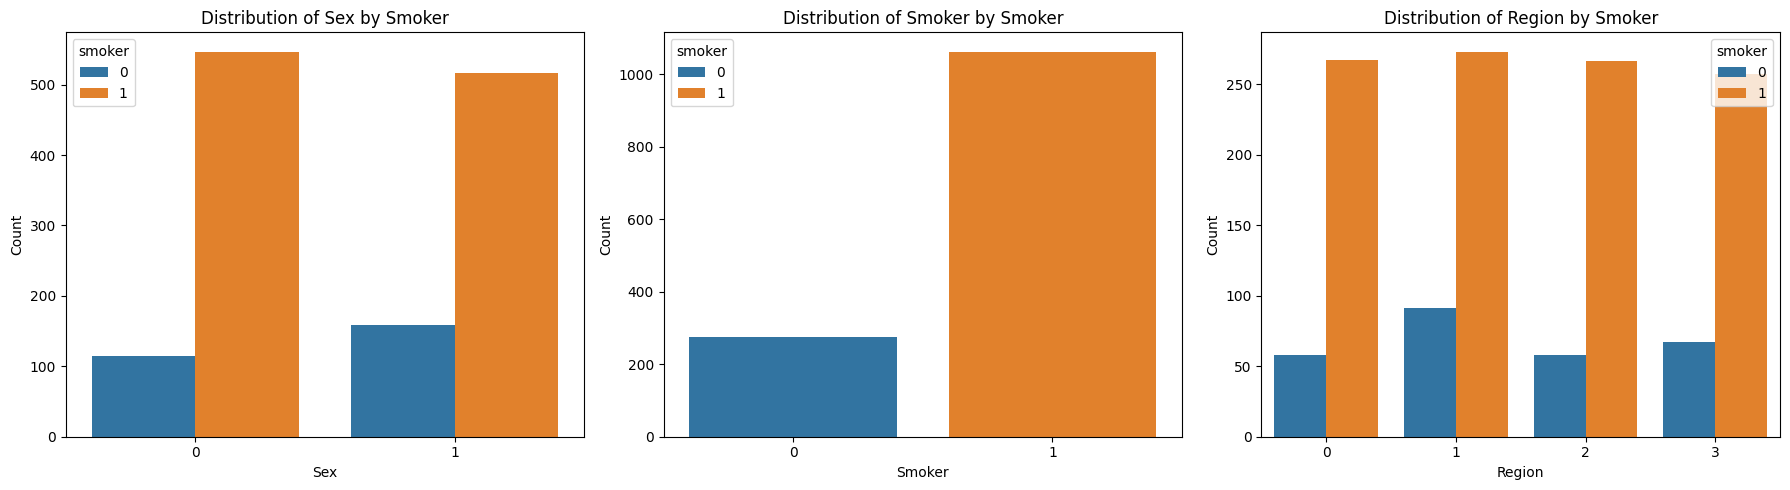

In [117]:
# Clustered bar charts for categorical variables
categorical_vars = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df_n, x=var, hue='smoker', ax=axes[i])
    axes[i].set_title(f'Distribution of {var.capitalize()} by Smoker')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



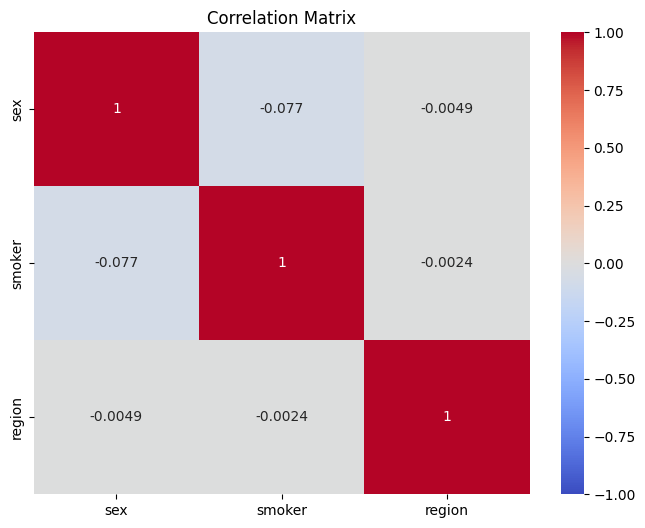

In [118]:
# Calculate correlation matrix
correlation_matrix = df_n[categorical_vars].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

***4.3. NUMERICAL-NUMERICAL ANALYSIS***

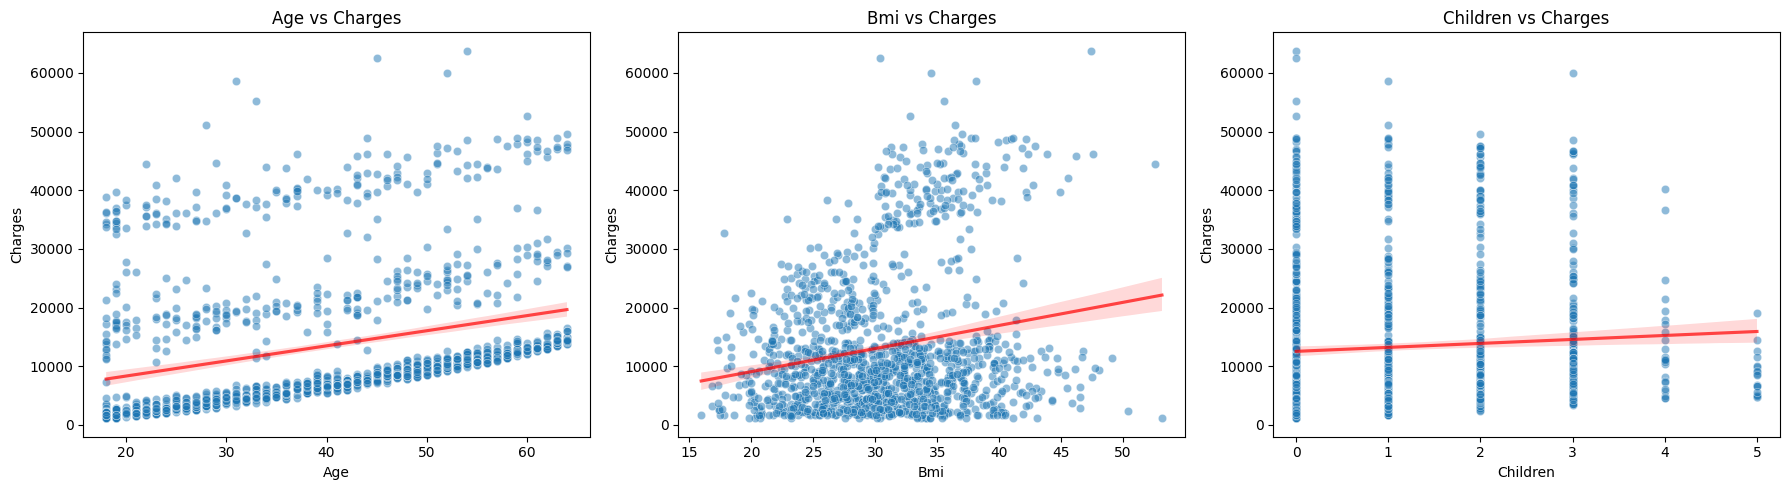

In [119]:
# List of numerical variables
numerical_vars = ['age', 'bmi', 'children', 'charges']

# Scatter plots between 'charges' and the other numerical variables with regression line
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(numerical_vars[:-1]):  # Excludes 'charges' in the last position
    # Scatter plot with sns.scatterplot
    sns.scatterplot(data=df_n, x=var, y='charges', ax=axes[i], alpha=0.5)
    
    # Regression line with sns.regplot
    sns.regplot(data=df_n, x=var, y='charges', ax=axes[i], scatter=False, color='red', line_kws={"alpha": 0.7})
    
    # Title and axis configurations
    axes[i].set_title(f'{var.capitalize()} vs Charges')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Charges')

plt.tight_layout()
plt.show()

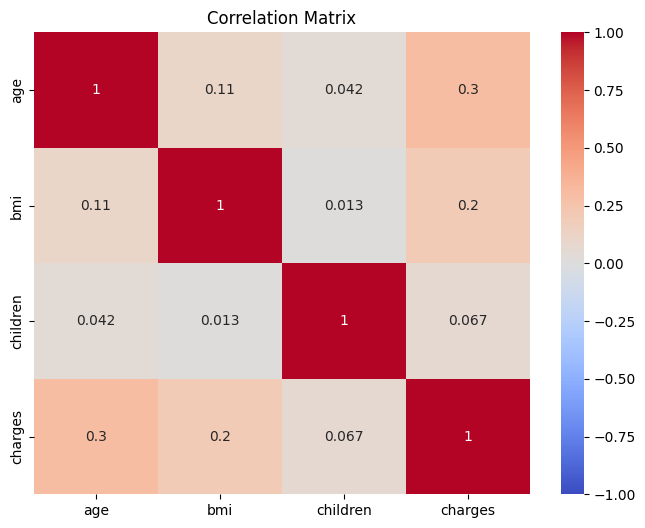

In [120]:
# Calculate the correlation matrix
correlation_matrix = df_n[numerical_vars].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


***4.4. CORRELATION MATRIX: CATEGORICAL-NUMERICAL***

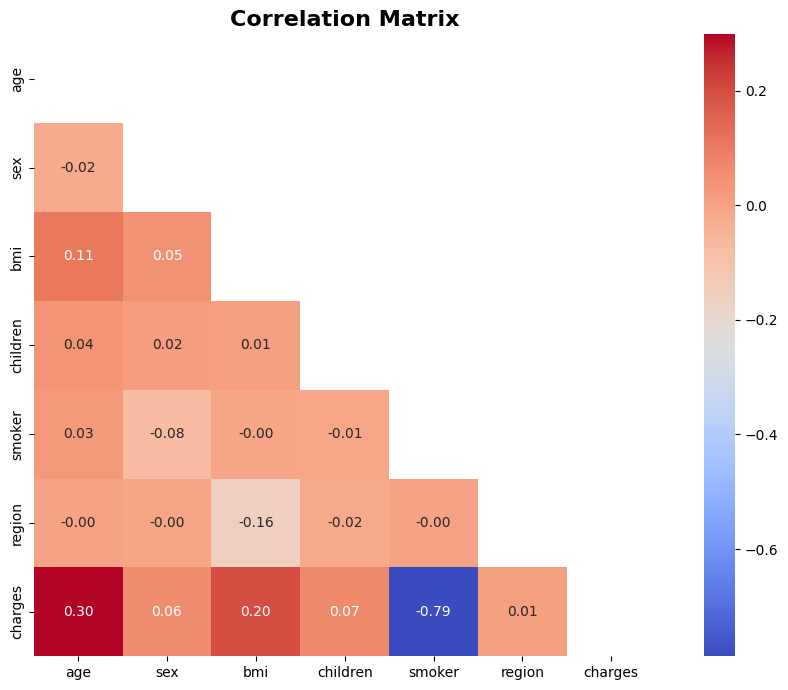

In [121]:
# Calculate the full correlation matrix
corr_matrix = df_n.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(10, 7))

# Plot the heatmap of the correlation matrix
# Use a mask to hide the upper triangle for clarity, as the matrix is symmetrical
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix), square=True)

# Add a title to the heatmap
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


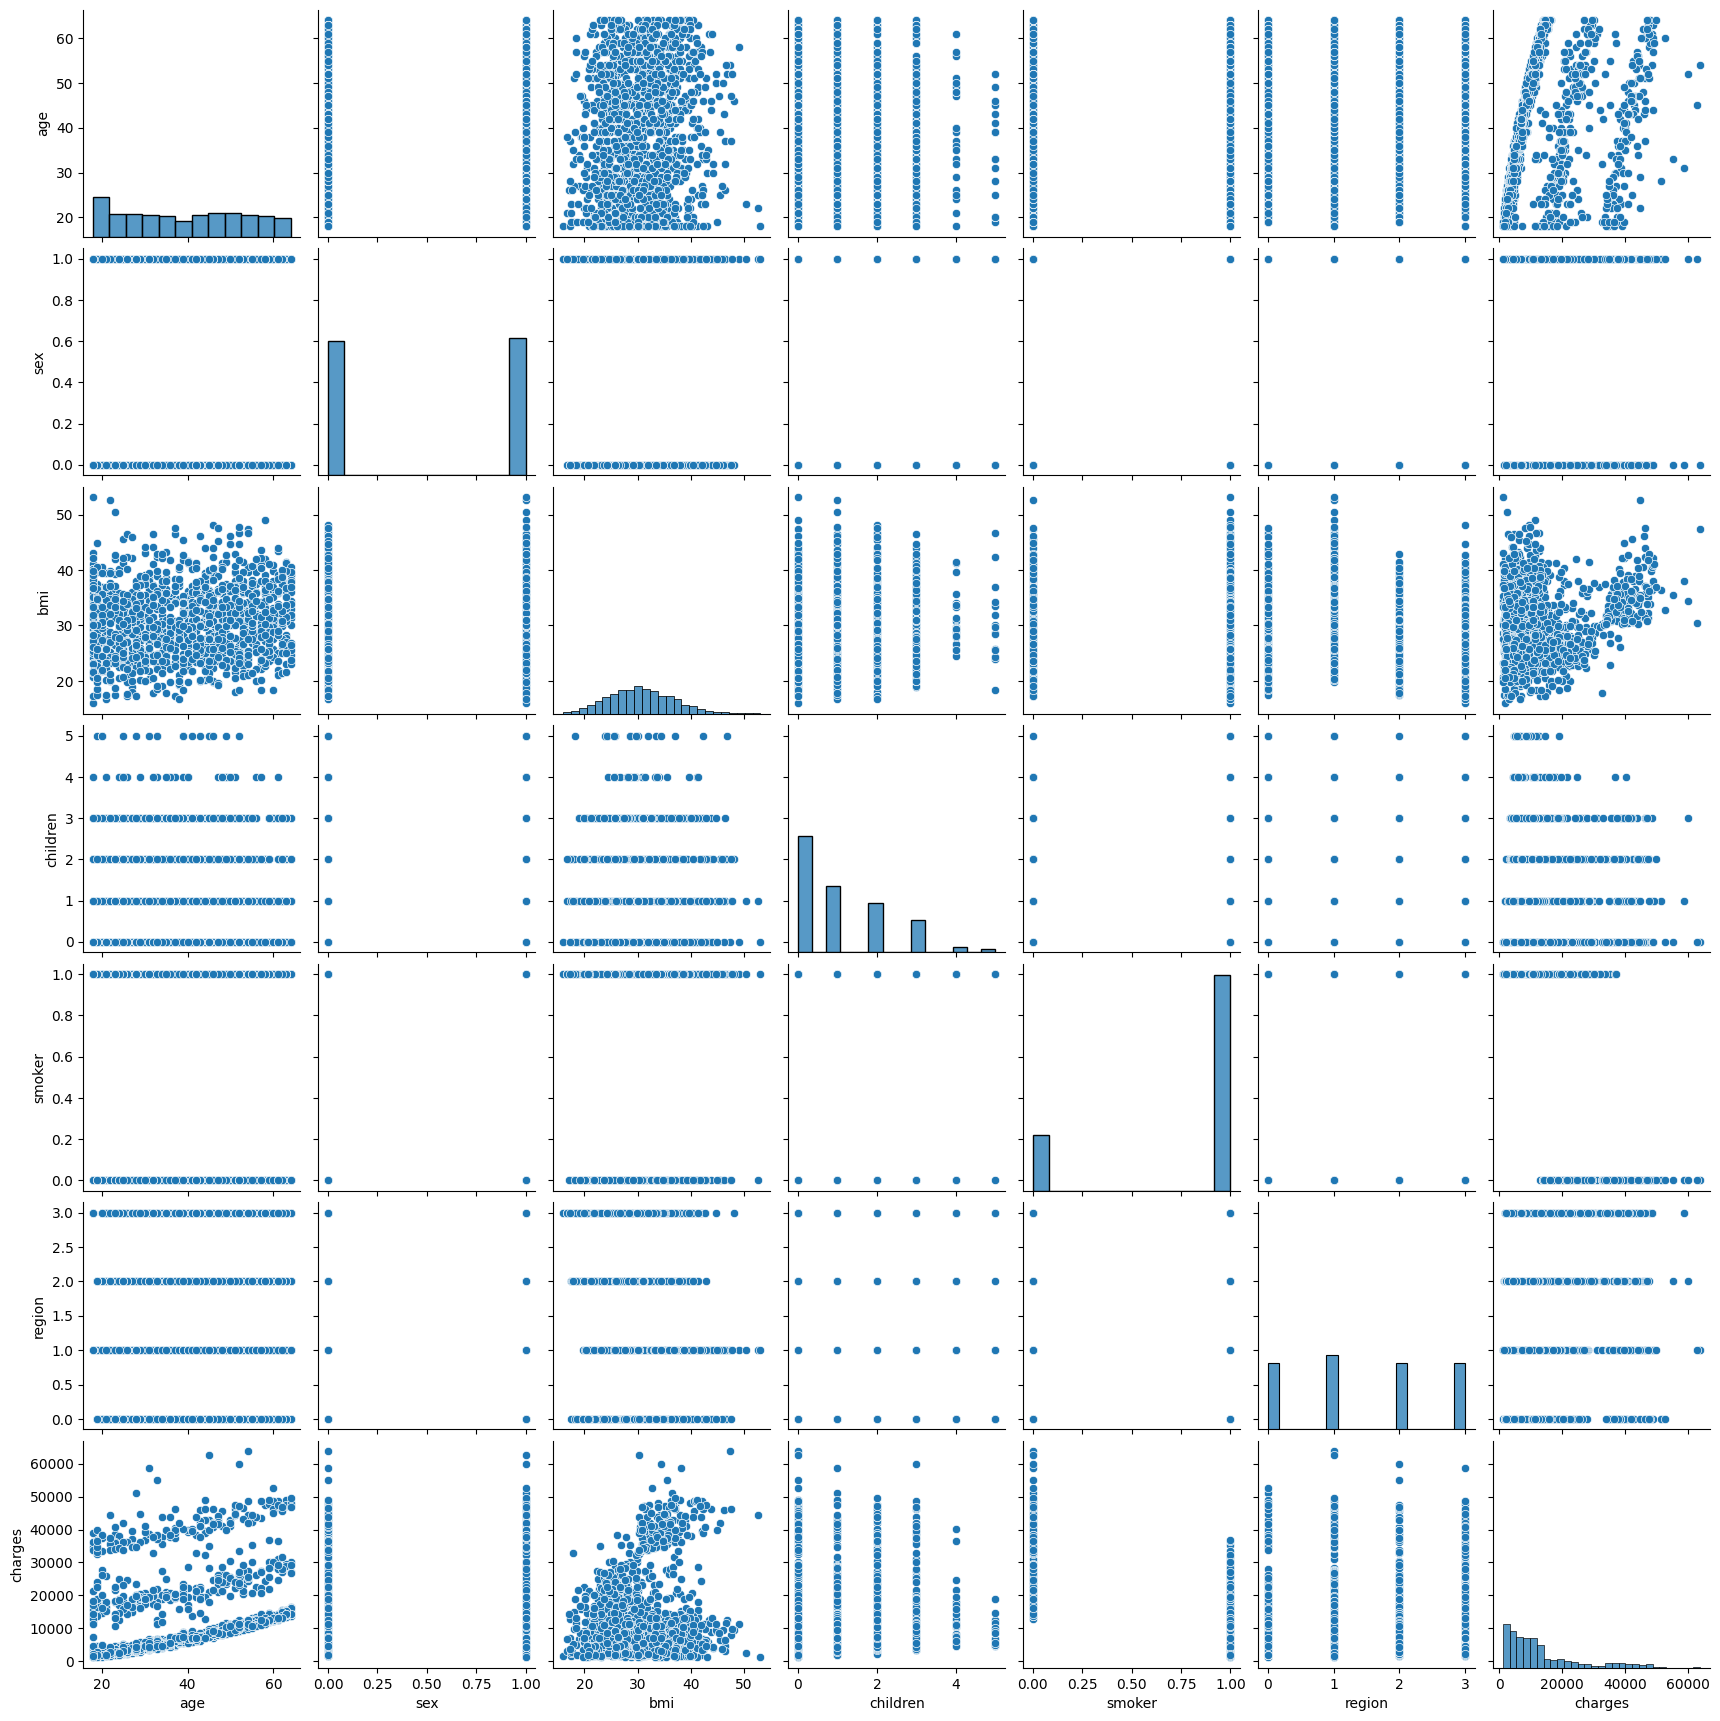

In [122]:
# Create pairplot for all numerical variables in the dataset
sns.pairplot(data=df_n)
plt.show()

***5.1 OUTLIER ANALYSIS***

In [123]:
# Generates descriptive statistics for the DataFrame `df_n` and rounds them to 2 decimal places
df_stats = df_n.describe().round(2)
df_stats

,age,sex,bmi,children,smoker,region,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00,1337.00
mean,39.22,0.5,30.66,1.10,0.8,1.48,13279.12
std,14.04,0.5,6.10,1.21,0.4,1.11,12110.36
min,18.00,0.0,15.96,0.00,0.0,0.00,1121.87
25%,27.00,0.0,26.29,0.00,1.0,1.00,4746.34
50%,39.00,1.0,30.40,1.00,1.0,1.00,9386.16
75%,51.00,1.0,34.70,2.00,1.0,2.00,16657.72
max,64.00,1.0,53.13,5.00,1.0,3.00,63770.43


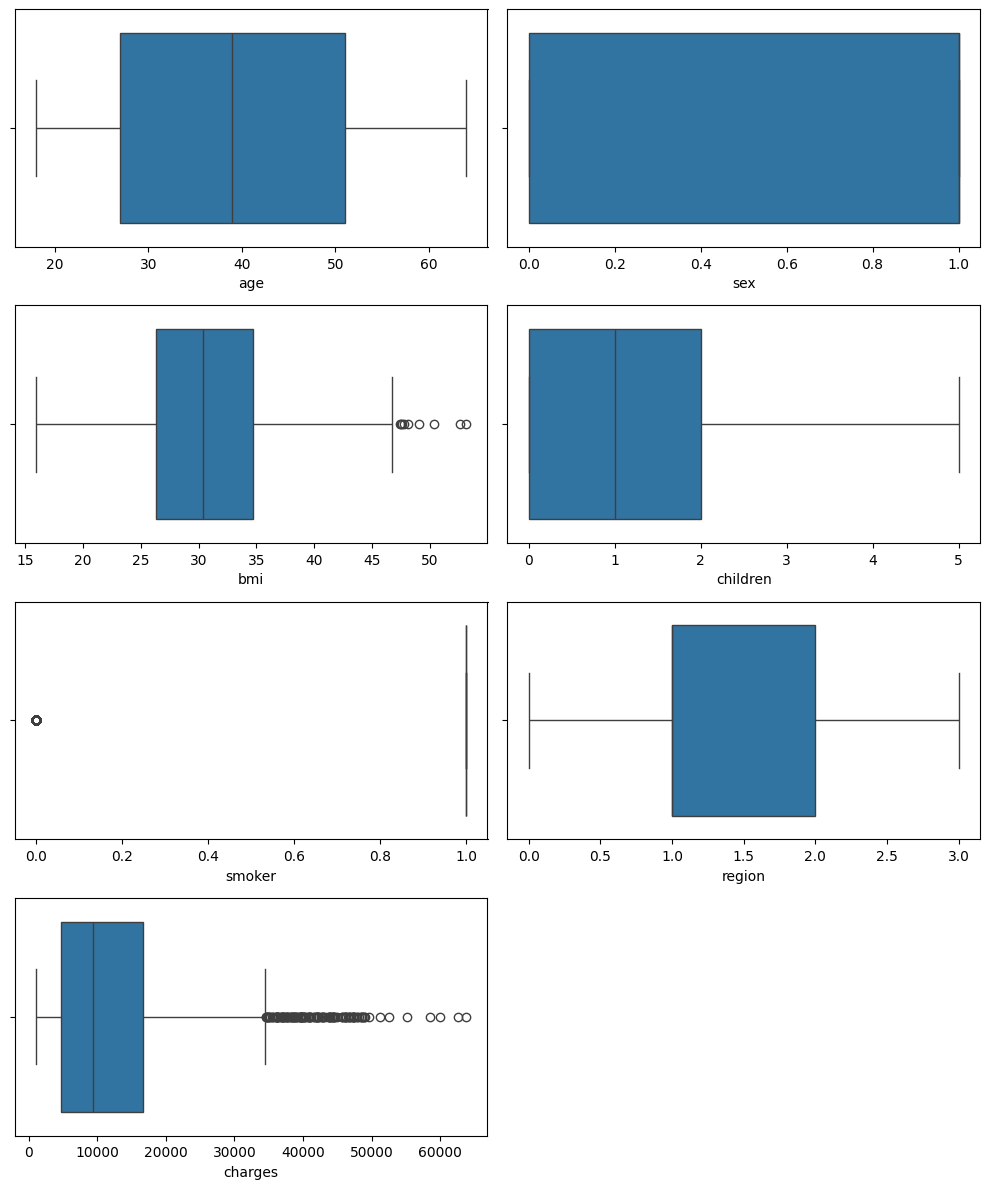

In [124]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = df_n, x='age')
sns.boxplot(ax = ax[0,1], data = df_n, x='sex')

sns.boxplot(ax = ax[1,0], data = df_n, x='bmi')
sns.boxplot(ax = ax[1,1], data = df_n, x='children')

sns.boxplot(ax = ax[2,0], data = df_n, x='smoker')
sns.boxplot(ax = ax[2,1], data = df_n, x='region')

sns.boxplot(ax = ax[3,0], data = df_n, x='charges')

# Remove the empty subplot
fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()

Outlier limits will be calculated only for the `bmi` variable, which will be used to create a new dataframe without outliers (df_without_outliers). The dataframe **with_outliers** and **without outliers** will be used to train our model and compare performance to determine the best approach.

In [125]:
df_with_outliers = df_n.copy()

In [126]:
df_without_outliers = df_n.copy()

In [127]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [128]:
# List of continuous features for outlier adjustment without negative lower limits
features_no_negative_outliers = ['bmi']

# Loop through each feature, adjusting outliers and confirming each step
for feature in features_no_negative_outliers:
    print(f"Processing outliers for feature: {feature}")
    df_without_outliers[feature] = remove_outliers(df_without_outliers[feature], feature_name=feature, allow_neg=False)
    print(f"Outlier adjustment complete for {feature}")


Processing outliers for feature: bmi
Outlier adjustment complete for bmi


In [129]:
df_with_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [130]:
df_without_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


***5.2 MISSING VALUES***

In [131]:
df_with_outliers.isna().sum()[df_with_outliers.isna().sum()>0]

Series([], dtype: int64)

* There are no missing values for treatment.

***5.3 SPLIT TRAIN/TEST OF BOTH DATAFRAMES***

In [146]:
# Function to split data into training and testing sets
def split(target, df, test_size=0.2, random_state=123):
    """
    Splits a DataFrame into training and testing sets.

    Parameters:
    - target: str, the name of the target column to be predicted
    - df: DataFrame, the complete DataFrame to split
    - test_size: float, proportion of the data to allocate to the test set (default is 0.2)
    - random_state: int, sets the seed for reproducibility (default is 123)

    Returns:
    - X_train, X_test: DataFrames containing the training and testing features
    - y_train, y_test: Series containing the training and testing target values
    """
    
    # Separate the features (X) from the target (y)
    X = df.drop(columns=target)  # Drop the target column from features
    y = df[target]               # Define the target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

In [147]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', df_with_outliers)
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', df_without_outliers)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [148]:
# View train and test data for verification (optional)
X_train_with_outliers.head()

,age,sex,bmi,children,smoker,region
1185,45,1,23.560,2,1,3
680,21,0,17.400,1,1,0
206,59,1,26.400,0,1,1
628,58,1,38.000,0,1,0
708,31,0,30.495,3,1,3


In [149]:
# Displays the first five rows of the `X_train_without_outliers` DataFrame for a quick preview of the data.
X_train_without_outliers.head()

,age,sex,bmi,children,smoker,region
1185,45,1,23.560,2,1,3
680,21,0,17.400,1,1,0
206,59,1,26.400,0,1,1
628,58,1,38.000,0,1,0
708,31,0,30.495,3,1,3


***5.4 NORMALIZATION***

In [150]:
def normalize_and_save(X_train, X_test, filename):
    """
    Normalizes the data using StandardScaler and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_norm: DataFrame with the normalized training data
    - X_test_norm: DataFrame with the normalized testing data
    """

    # Initialize and adjusts the scaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Ajusta o scaler com os dados de treino

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)

**5.5 min-MAX Scaling**

In [151]:
def minmax_and_save(X_train, X_test, filename):
    """
    Applies Min-Max Scaling to the data and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_minmax: DataFrame with the scaled training data
    - X_test_minmax: DataFrame with the scaled testing data
    """

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler with training data

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)

**6. FEATURE SELECTION**

In [152]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
    """
    Applies feature selection using SelectKBest and saves the model for future use.

    Parameters:
    - X_train: DataFrame with training data
    - X_test: DataFrame with testing data
    - y_train: Series with target training data
    - k: Number of features to select
    - filename: String, the name of the file to save the selection model

    Returns:
    - X_train_sel: DataFrame with selected features from training data
    - X_test_sel: DataFrame with selected features from testing data
    """
    # Creates the feature selection model
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    # Select columns based on model
    selected_columns = X_train.columns[selection_model.get_support()]

    # Transforms training and testing data to keep only selected features
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

    # Save the selection model
    joblib.dump(selection_model, f'../data/processed/{filename}.sav')

    return X_train_sel, X_test_sel

# Application of the function to select features with and without outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection_and_save(
    X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, 6, 'selection_model_with_outliers'
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection_and_save(
    X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, 6, 'selection_model_without_outliers'
)

C:\Users\ritin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
C:\Users\ritin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


**6.1 APPLYING THE FILTER TO THE NORMALIZED AND minMAX SCALED DATAFRAMES**

In [153]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

**6.2 SAVING THE CSV FILES**

In [154]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

# MACHINE LEARNING

### LINEAR REGRESSION

**WHICH IS THE BEST DATASET?**

In [155]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [156]:
results = []

# Itera sobre os DataFrames de treino e teste
for index in range(len(train)):
    model = LinearRegression()
    train_df = train[index]
    model.fit(train_df, y_train) # Ajusta o modelo com o conjunto de treino
    y_test_pred = model.predict(test[index]) # Faz previsões no conjunto de teste correspondente
    
    # Calcula as métricas de avaliação
    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],  # Nome do DataFrame de treino
            'Coef': model.coef_,
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2),  # Cálculo correto do RMSE
            "R2_score": round(r2_score(y_test, y_test_pred), 5)            
        }
    )

# Ordena os resultados pelo RMSE para identificar o melhor modelo
results = sorted(results, key=lambda x: x['RMSE'])
best_ind = results[0]['index']
best_df_train = results[0]['df_train']

# Exibe os resultados
results


[{'index': 1,
  'df_train': 'X_train_without_outliers_sel',
  'Coef': array([   258.15828897,   -179.48548027,    324.92226339,    496.26178404,
         -23358.13378602,    353.26710699]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.80009},
 {'index': 3,
  'df_train': 'X_train_without_outliers_norm_sel',
  'Coef': array([ 3609.97813402,   -89.73955955,  1969.36643617,   599.24081221,
         -9459.20198842,   385.84136887]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.80009},
 {'index': 5,
  'df_train': 'X_train_without_outliers_minmax_sel',
  'Coef': array([ 11875.28129249,   -179.48548027,  10187.93756856,   2481.30892022,
         -23358.13378602,   1059.80132097]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.80009},
 {'index': 0,
  'df_train': 'X_train_with_outliers_sel',
  'Coef': array([   258.63442857,   -185.98692562,    321.56240415,    498.21466835,
         -23356.13969946,    3